In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**** looki at the data****


In [3]:
test= pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/test.csv").drop(columns= "subject")
test.shape

(2947, 562)

In [4]:
df= pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/train.csv").drop(columns= "subject")
print(df.shape)
df.head()


(7352, 562)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [5]:
df["Activity"].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [6]:
df1= df.copy()
df1.shape

(7352, 562)

**Some libraries**

In [7]:

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold

In [8]:

X= df1.drop("Activity", axis= 1)
Y= df1["Activity"]

In [9]:
type(Y)

pandas.core.series.Series

In [10]:
type(X.columns)

pandas.core.indexes.base.Index

***Pipeline and trasnformer***


In [11]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assume X is a pandas DataFrame
num_columns = list(range(X.shape[1]))  # Get the list of all column indices

# Impute missing values using column indices
trf_any = ColumnTransformer(
    [("impute_if_any", SimpleImputer(strategy="mean"), num_columns)],
    remainder="passthrough"
)

# Scale features using column indices
trf_ss = ColumnTransformer(
    [("scaling", StandardScaler(), num_columns)],
    remainder="passthrough"
)

# Combine into a pipeline
pipeline = Pipeline(steps=[
    ('impute', trf_any),
    ('scale', trf_ss)
])

# Fit and transform the data
X_transformed = pipeline.fit_transform(X)
X_transformed.shape

(7352, 561)

In [13]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Y_encoded= le.fit_transform(Y)

In [14]:
pipeline

Pipeline(steps=[('impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_if_any',
                                                  SimpleImputer(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])])),
                ('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])]))])

In [15]:
pipeline.named_steps

{'impute': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_if_any', SimpleImputer(),
                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                   25, 26, 27, 28, 29, ...])]),
 'scale': ColumnTransformer(remainder='passthrough',
                   transformers=[('scaling', StandardScaler(),
                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                   25, 26, 27, 28, 29, ...])])}

In [16]:
X_transformed
l=pd.DataFrame(X_transformed, columns=X.columns)
l.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.795359,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.130614,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,1.152336,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,1.112769,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.149577,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tBodyAcc-mad()-Z', ylabel='Density'>

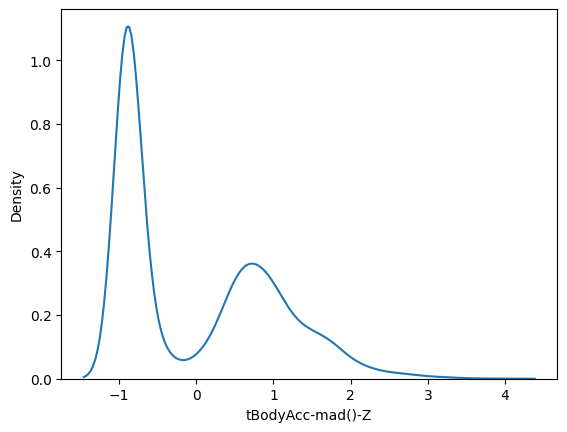

In [17]:
import seaborn as sns
sns.kdeplot(data= l ,x= 'tBodyAcc-mad()-Z')

In [18]:
pd.DataFrame(Y_encoded).value_counts()

0
0    1407
2    1374
1    1286
3    1226
5    1073
4     986
Name: count, dtype: int64

**Splitting train/test**

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(X_transformed, Y_encoded,  random_state= 42) #default= 0.25

In [20]:
len(Y_test)

1838

**Suppress warnings**

In [21]:
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


**LOGREG**

In [22]:
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

kf = KFold(n_splits=5)
skf = StratifiedKFold(n_splits=5)

cv_strategies = [kf, skf,5]

# Define logistic regression models
logreg_l2_100 = LogisticRegression(penalty="l2", dual=False, tol=1e-4, C=1.0, fit_intercept=True, 
                            intercept_scaling=1, class_weight=None, random_state=None, solver="lbfgs", max_iter=100, 
                            multi_class="auto", verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

logreg_l1_100 = LogisticRegression(penalty="l1", dual=False, tol=1e-4, C=1.0, fit_intercept=True, 
                            intercept_scaling=1, class_weight=None, random_state=None, solver="liblinear", max_iter=100, 
                            multi_class="auto", verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

logreg_elasticnet_100 = LogisticRegression(penalty="elasticnet", dual=False, tol=1e-4, C=1.0, fit_intercept=True, 
                            intercept_scaling=1, class_weight=None, random_state=None, solver="saga", max_iter=100, 
                            multi_class="auto", verbose=0, warm_start=False, n_jobs=None, l1_ratio=0.5)

# List of models
models = [logreg_l2_100, logreg_l1_100, logreg_elasticnet_100]
model_names = ["Logistic Regression L2", "Logistic Regression L1", "Logistic Regression ElasticNet"]

# Perform cross-validation and calculate accuracy
for model, name in zip(models, model_names):
    print(f"Evaluating {name}")
    for cv in cv_strategies:
        scores = cross_val_score(model, X_train, Y_train, cv=cv, scoring='accuracy')
        
        print(f"Cross-validation strategy: {cv.__class__.__name__}")
        print(f"Mean accuracy: {np.mean(scores):.4f}")
        print(f"Std accuracy: {np.std(scores):.4f}")
    print("\n")

Evaluating Logistic Regression L2
Cross-validation strategy: KFold
Mean accuracy: 0.9819
Std accuracy: 0.0064
Cross-validation strategy: StratifiedKFold
Mean accuracy: 0.9813
Std accuracy: 0.0057
Cross-validation strategy: int
Mean accuracy: 0.9813
Std accuracy: 0.0057


Evaluating Logistic Regression L1
Cross-validation strategy: KFold
Mean accuracy: 0.9857
Std accuracy: 0.0056
Cross-validation strategy: StratifiedKFold
Mean accuracy: 0.9857
Std accuracy: 0.0058
Cross-validation strategy: int
Mean accuracy: 0.9859
Std accuracy: 0.0055


Evaluating Logistic Regression ElasticNet
Cross-validation strategy: KFold
Mean accuracy: 0.9730
Std accuracy: 0.0044
Cross-validation strategy: StratifiedKFold
Mean accuracy: 0.9724
Std accuracy: 0.0045
Cross-validation strategy: int
Mean accuracy: 0.9730
Std accuracy: 0.0043




**Regularizations each sold seperately**

In [23]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

ridge= Ridge(alpha= 0.1)
lasso= Lasso(alpha= 0.1)
elasticnet= ElasticNet(alpha= 0.1)

ridge.fit(X_train, Y_train)
lasso.fit(X_train, Y_train)
elasticnet.fit(X_train, Y_train)

y_pred_l2= ridge.predict(X_test)
y_pred_l1= lasso.predict(X_test)
y_pred_elasticnet= elasticnet.predict(X_test)

print(f'l2- {r2_score(Y_test, y_pred_l1)}')
print(f'l1- {r2_score(Y_test, y_pred_l2)}')
print(f'elasticnet- {r2_score(Y_test, y_pred_elasticnet)}')

print()

from sklearn.linear_model import SGDRegressor
reg= SGDRegressor(loss="squared_error" , penalty="l2", alpha=0.001, l1_ratio=0.15, fit_intercept=True, max_iter=1000)
reg.fit(X_train, Y_train)
y_pred_sgd= reg.predict(X_test)
print(f"sgd- {r2_score(Y_test, y_pred_sgd)}" )


l2- 0.8921505866744928
l1- 0.9682345841856135
elasticnet- 0.9121275041770694

sgd- 0.9598446191036535


***Removing duplicates***

***1. Removing duplicates***

In [24]:
'''def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns'''

'def get_duplicate_columns(df):\n    \n    duplicate_columns = {}\n    seen_columns = {}\n\n    for column in df.columns:\n        current_column = df[column]\n\n        # Convert column data to bytes\n        try:\n            current_column_hash = current_column.values.tobytes()\n        except AttributeError:\n            current_column_hash = current_column.to_string().encode()\n\n        if current_column_hash in seen_columns:\n            if seen_columns[current_column_hash] in duplicate_columns:\n                duplicate_columns[seen_columns[current_column_hash]].append(column)\n            else:\n                duplicate_columns[seen_columns[current_column_hash]] = [column]\n        else:\n            seen_columns[current_column_hash] = column\n\n    return duplicate_columns'

In [25]:
X_train_df=pd.DataFrame(X_train, columns= X.columns)
X_train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.814067,-0.263162,1.295356,1.600451,1.783981,0.780166,1.660054,1.589274,0.770563,1.780717,...,-0.371666,0.039794,-0.282024,1.088751,1.919634,-1.422743,-0.253244,-0.407017,0.668992,0.761677
1,0.291755,0.205839,-0.392897,-0.865761,-0.946312,-0.896157,-0.857099,-0.947512,-0.899287,-0.853424,...,0.430773,0.191785,0.179759,0.108686,0.454960,0.775265,-1.109626,1.746576,-2.014468,-1.371036
2,0.045526,-0.094877,-0.187740,-0.873929,-0.915752,-0.854818,-0.866557,-0.918904,-0.857691,-0.866400,...,-1.117866,0.971279,0.517084,-0.079030,0.020547,-0.096119,-1.729630,-0.636042,0.532698,0.091872
3,0.137185,0.018293,-0.021798,-0.743706,-0.924211,-0.851915,-0.723043,-0.915684,-0.841668,-0.788138,...,0.619088,0.847589,0.831043,0.285345,0.913710,-0.810756,-0.981723,1.765021,-1.415786,-2.044326
4,0.078419,-0.043830,0.060346,-0.863331,-0.854365,-0.899872,-0.855054,-0.843821,-0.904430,-0.857258,...,2.511388,-1.438099,-0.985991,-0.704862,-0.221740,0.025426,0.025756,-0.175508,-0.269482,-0.720219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,0.062747,-0.309026,0.231285,0.111624,0.809539,0.398153,0.136735,0.853573,0.426141,-0.020458,...,-0.409081,2.257834,2.684198,-0.486877,-0.312680,1.513346,-1.209177,-0.419018,0.337926,-0.463734
5510,0.209157,-0.773211,-0.281512,0.702903,0.594568,0.322514,0.762173,0.653106,0.187194,0.340417,...,-0.657695,0.888002,0.859373,-0.083788,-2.003657,-0.079435,1.046484,-0.352876,0.159898,-0.588425
5511,0.276954,-0.015824,-0.190268,-0.048493,0.585686,0.429921,-0.042812,0.562026,0.455408,-0.144126,...,-0.124564,2.598719,3.166926,-1.256979,-1.094701,0.143308,-0.609239,-0.717048,0.420072,0.077305
5512,0.085210,-0.031383,-0.081500,-0.867803,-0.943825,-0.862526,-0.859954,-0.941284,-0.862468,-0.861140,...,1.651911,-1.815207,-1.166448,-0.261901,0.027004,-0.491684,1.272800,-0.684184,0.076632,-0.149606


In [26]:
X_test_df= pd.DataFrame(X_test, columns=X.columns)

In [27]:
X_train_df_duplicate= X_train_df.loc[:, X_train_df.T.duplicated()]
X_train_df_duplicate
print(f"Total number of duplicated columns in X_train: {X_train_df_duplicate.shape[1]}")

X_test_df_duplicate= X_test_df.loc[:, X_test_df.T.duplicated()]
print(f"Total number of duplicated columns in X_test: {X_test_df_duplicate.shape[1]}")

Total number of duplicated columns in X_train: 21
Total number of duplicated columns in X_test: 21


In [28]:
X_train_df_1= X_train_df.loc[:, ~X_train_df.T.duplicated()]
X_test_df_1= X_test_df.loc[:, ~X_train_df.T.duplicated()]

In [29]:
X_train_df_1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.814067,-0.263162,1.295356,1.600451,1.783981,0.780166,1.660054,1.589274,0.770563,1.780717,...,-0.371666,0.039794,-0.282024,1.088751,1.919634,-1.422743,-0.253244,-0.407017,0.668992,0.761677
1,0.291755,0.205839,-0.392897,-0.865761,-0.946312,-0.896157,-0.857099,-0.947512,-0.899287,-0.853424,...,0.430773,0.191785,0.179759,0.108686,0.454960,0.775265,-1.109626,1.746576,-2.014468,-1.371036
2,0.045526,-0.094877,-0.187740,-0.873929,-0.915752,-0.854818,-0.866557,-0.918904,-0.857691,-0.866400,...,-1.117866,0.971279,0.517084,-0.079030,0.020547,-0.096119,-1.729630,-0.636042,0.532698,0.091872
3,0.137185,0.018293,-0.021798,-0.743706,-0.924211,-0.851915,-0.723043,-0.915684,-0.841668,-0.788138,...,0.619088,0.847589,0.831043,0.285345,0.913710,-0.810756,-0.981723,1.765021,-1.415786,-2.044326
4,0.078419,-0.043830,0.060346,-0.863331,-0.854365,-0.899872,-0.855054,-0.843821,-0.904430,-0.857258,...,2.511388,-1.438099,-0.985991,-0.704862,-0.221740,0.025426,0.025756,-0.175508,-0.269482,-0.720219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,0.062747,-0.309026,0.231285,0.111624,0.809539,0.398153,0.136735,0.853573,0.426141,-0.020458,...,-0.409081,2.257834,2.684198,-0.486877,-0.312680,1.513346,-1.209177,-0.419018,0.337926,-0.463734
5510,0.209157,-0.773211,-0.281512,0.702903,0.594568,0.322514,0.762173,0.653106,0.187194,0.340417,...,-0.657695,0.888002,0.859373,-0.083788,-2.003657,-0.079435,1.046484,-0.352876,0.159898,-0.588425
5511,0.276954,-0.015824,-0.190268,-0.048493,0.585686,0.429921,-0.042812,0.562026,0.455408,-0.144126,...,-0.124564,2.598719,3.166926,-1.256979,-1.094701,0.143308,-0.609239,-0.717048,0.420072,0.077305
5512,0.085210,-0.031383,-0.081500,-0.867803,-0.943825,-0.862526,-0.859954,-0.941284,-0.862468,-0.861140,...,1.651911,-1.815207,-1.166448,-0.261901,0.027004,-0.491684,1.272800,-0.684184,0.076632,-0.149606


***2. variance threshold***

In [30]:
variance = X_train_df_1.var()
min_variance = variance.min()  # 0.873151033444845
max_variance = variance.max()  # 1.1524263760506195

In [31]:
threshold_min = min_variance
threshold_max = max_variance
threshold_mid = (min_variance + max_variance) / 2
threshold_proportional = 0.8 * max_variance

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

# Define the range of thresholds
threshold_min = 0.873151033444845
threshold_max = 1.15
step_size = 0.01  # Step size for generating thresholds
thresholds = np.arange(threshold_min, threshold_max, step_size)

accuracies = []

# Loop through each threshold
for threshold in thresholds:
    var = VarianceThreshold(threshold=threshold)
    temp_x_train = var.fit_transform(X_train_df_1)
    temp_x_test = var.transform(X_test_df_1)
    
    # Get the column names of selected features
    columns_2 = X_train_df_1.columns[var.get_support()]
    
    # Create DataFrames with selected features
    temp_df_x_train = pd.DataFrame(temp_x_train, columns=columns_2)
    temp_df_x_test = pd.DataFrame(temp_x_test, columns=columns_2)
    
    # Train the model
    model = LogisticRegression()
    model.fit(temp_df_x_train, Y_train)
    
    # Make predictions
    y_pred = model.predict(temp_df_x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies.append(accuracy)


# Create a Plotly figure
fig = go.Figure()

# Add a line plot for accuracy vs. variance threshold
fig.add_trace(go.Scatter(
    x=thresholds,
    y=accuracies,
    mode='lines+markers',
    name='Accuracy',
    marker=dict(color='blue'),
    line=dict(width=2)
))

# Update layout
fig.update_layout(
    title='Accuracy vs. Variance Threshold',
    xaxis_title='Variance Threshold',
    yaxis_title='Accuracy',
    template='plotly_white',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True)
)

# Show the plot
fig.show()

In [33]:
from sklearn.feature_selection import VarianceThreshold
threshold=0.993151
var= VarianceThreshold(threshold= threshold)
var.fit(X_train_df_1)
sum(var.get_support())
temp_x_train= var.transform(X_train_df_1)
temp_x_test = var.transform(X_test_df_1)


In [34]:
columns_2= X_train_df_1.columns[var.get_support()]
columns_2

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=376)

In [35]:
temp_df_x_train= pd.DataFrame(temp_x_train, columns= columns_2)
temp_df_x_test= pd.DataFrame(temp_x_test , columns= columns_2)

In [36]:
print(temp_df_x_train.shape)
print(temp_df_x_test.shape)
print(Y_train.shape)

print(Y_test.shape)

(5514, 376)
(1838, 376)
(5514,)
(1838,)


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()

# Train the model
model.fit(temp_df_x_train, Y_train)
y_pred = model.predict(temp_df_x_test)

# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(Y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.98
Confusion Matrix:
[[343   0   0   0   0   0]
 [  0 314  14   0   0   0]
 [  0  16 336   0   0   0]
 [  0   0   0 302   0   1]
 [  0   0   0   2 254   0]
 [  0   0   0   0   2 254]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       343
           1       0.95      0.96      0.95       328
           2       0.96      0.95      0.96       352
           3       0.99      1.00      1.00       303
           4       0.99      0.99      0.99       256
           5       1.00      0.99      0.99       256

    accuracy                           0.98      1838
   macro avg       0.98      0.98      0.98      1838
weighted avg       0.98      0.98      0.98      1838



***3. Correlation***

In [38]:
temp_df_x_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.814067,-0.263162,1.295356,1.600451,1.783981,0.780166,1.660054,1.589274,0.770563,1.780717,...,-0.371666,0.039794,-0.282024,1.088751,1.919634,-1.422743,-0.253244,-0.407017,0.668992,0.761677
1,0.291755,0.205839,-0.392897,-0.865761,-0.946312,-0.896157,-0.857099,-0.947512,-0.899287,-0.853424,...,0.430773,0.191785,0.179759,0.108686,0.454960,0.775265,-1.109626,1.746576,-2.014468,-1.371036
2,0.045526,-0.094877,-0.187740,-0.873929,-0.915752,-0.854818,-0.866557,-0.918904,-0.857691,-0.866400,...,-1.117866,0.971279,0.517084,-0.079030,0.020547,-0.096119,-1.729630,-0.636042,0.532698,0.091872
3,0.137185,0.018293,-0.021798,-0.743706,-0.924211,-0.851915,-0.723043,-0.915684,-0.841668,-0.788138,...,0.619088,0.847589,0.831043,0.285345,0.913710,-0.810756,-0.981723,1.765021,-1.415786,-2.044326
4,0.078419,-0.043830,0.060346,-0.863331,-0.854365,-0.899872,-0.855054,-0.843821,-0.904430,-0.857258,...,2.511388,-1.438099,-0.985991,-0.704862,-0.221740,0.025426,0.025756,-0.175508,-0.269482,-0.720219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,0.062747,-0.309026,0.231285,0.111624,0.809539,0.398153,0.136735,0.853573,0.426141,-0.020458,...,-0.409081,2.257834,2.684198,-0.486877,-0.312680,1.513346,-1.209177,-0.419018,0.337926,-0.463734
5510,0.209157,-0.773211,-0.281512,0.702903,0.594568,0.322514,0.762173,0.653106,0.187194,0.340417,...,-0.657695,0.888002,0.859373,-0.083788,-2.003657,-0.079435,1.046484,-0.352876,0.159898,-0.588425
5511,0.276954,-0.015824,-0.190268,-0.048493,0.585686,0.429921,-0.042812,0.562026,0.455408,-0.144126,...,-0.124564,2.598719,3.166926,-1.256979,-1.094701,0.143308,-0.609239,-0.717048,0.420072,0.077305
5512,0.085210,-0.031383,-0.081500,-0.867803,-0.943825,-0.862526,-0.859954,-0.941284,-0.862468,-0.861140,...,1.651911,-1.815207,-1.166448,-0.261901,0.027004,-0.491684,1.272800,-0.684184,0.076632,-0.149606


<Axes: >

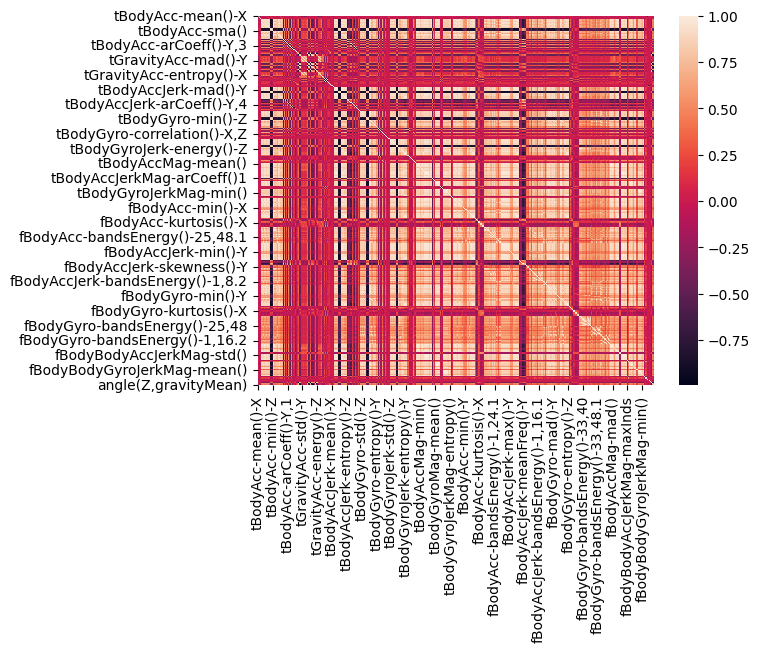

In [39]:
import seaborn as sns
sns.heatmap(temp_df_x_train.corr())

In [40]:
corr_matrix= temp_df_x_train.corr()

In [41]:
corr_matrix.shape

(376, 376)

In [42]:
columns_to_drop= []
columns= corr_matrix.columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

1379


In [43]:
columnstodrop= set(columns_to_drop)
len(columnstodrop)

192

In [44]:
376-192

184

In [45]:
temp_df_x_train.drop(columns= columnstodrop, axis= 1, inplace= True)
temp_df_x_test.drop(columns= columnstodrop, axis= 1, inplace= True)

In [46]:
model = LogisticRegression()
model.fit(temp_df_x_train, Y_train)

# Make predictions
y_pred = model.predict(temp_df_x_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9717083786724701

***Variance inflation factor***

In [51]:
import statsmodel.api as sm

columns= temp_df_x_train.columns
for i in range(len(columns)):
    x= temp_df_x_train.loc[:, temp_df_x_train!=columns[i]]
    y= temp_df_x_train.loc[:, temp_df_x_train==columns[i]]
    
M1= sm.OLS[Y_train, temp_df_x_train]
results= M1.fit()
results

ModuleNotFoundError: No module named 'statsmodel'

In [81]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import plotly.express as px

# Assuming X_train_df_1 is your DataFrame with 180 columns
# Calculate VIF for each feature
X = temp_df_x_train
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Plot VIF using Plotly
fig = px.bar(vif_data, x="Feature", y="VIF", title="VIF for Each Feature",
             labels={"Feature": "Features", "VIF": "Variance Inflation Factor"},
             template="plotly_white")

# Show only the top 20 features with the highest VIF
fig.update_xaxes(type='category', categoryorder='total descending')
fig.update_traces(marker_color='blue')

# Show the plot
fig.show()


In [82]:
vif_data

,Feature,VIF
23,"tBodyGyro-arCoeff()-X,2",309.460140
22,"tBodyGyro-arCoeff()-X,1",229.660191
11,tBodyGyro-std()-Y,139.618716
12,tBodyGyro-std()-Z,126.432742
35,tBodyGyroJerk-energy()-X,108.991358
...,...,...
120,fBodyBodyAccJerkMag-maxInds,1.144204
31,tBodyGyroJerk-mean()-Y,1.139252
127,"angle(tBodyAccMean,gravity)",1.101963
128,"angle(tBodyAccJerkMean),gravityMean)",1.100707


In [54]:
col_vif=[]
for i in range(len(vif_data)):
    if vif_data['VIF'].iloc[i] <318:
        col_vif.append(vif_data["Feature"].iloc[i])

In [74]:
len(col_vif)

177

In [75]:
columnstodrop_vif = vif_data[vif_data['VIF'] > 318]['Feature'].tolist()

print("Selected features with VIF > 318:")
print(len(columnstodrop_vif))

Selected features with VIF > 318:
7


In [76]:
temp_df_x_train_vif =temp_df_x_train.copy()
temp_df_x_test_vif =temp_df_x_test.copy()

In [79]:
temp_df_x_train_vif.shape

(5514, 134)

In [77]:
temp_df_x_train_vif.drop(columns= columnstodrop_vif, axis= 1, inplace= True)
temp_df_x_test_vif.drop(columns= columnstodrop_vif, axis= 1, inplace= True)

KeyError: "['tGravityAcc-mean()-Y', 'tGravityAcc-mean()-X', 'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2'] not found in axis"

In [83]:
temp_df_x_train_vif.shape

(5514, 134)

In [84]:
X = temp_df_x_train_vif
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Plot VIF using Plotly
fig = px.bar(vif_data, x="Feature", y="VIF", title="VIF for Each Feature",
             labels={"Feature": "Features", "VIF": "Variance Inflation Factor"},
             template="plotly_white")

# Show only the top 20 features with the highest VIF
fig.update_xaxes(type='category', categoryorder='total descending')
fig.update_traces(marker_color='blue')

# Show the plot
fig.show()

In [86]:
model4 = LogisticRegression()
model4.fit(temp_df_x_train_vif, Y_train)

# Make predictions
y_pred = model4.predict(temp_df_x_test_vif)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9651795429815017

***4. Anova***

In [95]:
from sklearn.feature_selection import f_classif, SelectKBest

Kbest= SelectKBest(k=75)
Kbest.fit(temp_df_x_train, Y_train)
columns_3= temp_df_x_train.columns[Kbest.get_support()]

In [96]:
temp_df_x_train

,tBodyAccJerk-min()-Z,tBodyAccJerk-entropy()-X,"tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-Y,Z",...,fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-1.662820,0.809862,-0.427493,-0.723747,-1.378309,0.643292,-1.018521,0.560963,-1.059499,-0.443004,...,1.616359,-0.371666,0.039794,1.088751,1.919634,-1.422743,-0.253244,-0.407017,0.668992,0.761677
1,0.815410,-1.007293,1.906768,1.559581,0.164374,-0.036037,-0.283178,0.597960,1.526461,-1.268974,...,-0.638082,0.430773,0.191785,0.108686,0.454960,0.775265,-1.109626,1.746576,-2.014468,-1.371036
2,0.793980,-1.187443,0.899068,0.542196,-0.913893,-0.662866,-0.751551,0.551198,1.157657,-0.175984,...,-0.573793,-1.117866,0.971279,-0.079030,0.020547,-0.096119,-1.729630,-0.636042,0.532698,0.091872
3,0.783197,-1.000458,-1.570308,-1.633542,0.115051,0.441410,0.019003,0.937063,0.391562,0.278777,...,-0.652061,0.619088,0.847589,0.285345,0.913710,-0.810756,-0.981723,1.765021,-1.415786,-2.044326
4,0.802042,-1.121210,1.286540,-0.020890,-0.064631,0.201710,-0.548205,0.600515,-1.142377,0.401104,...,-0.642227,2.511388,-1.438099,-0.704862,-0.221740,0.025426,0.025756,-0.175508,-0.269482,-0.720219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,-0.234771,0.981873,-0.510864,-0.406303,-1.324375,0.087093,1.279624,-0.619657,-0.288077,-1.169311,...,-0.556651,-0.409081,2.257834,-0.486877,-0.312680,1.513346,-1.209177,-0.419018,0.337926,-0.463734
5510,-0.864903,0.951353,-1.675082,0.184113,1.194248,0.447070,1.228052,-1.004302,0.444068,-2.712924,...,-0.380305,-0.657695,0.888002,-0.083788,-2.003657,-0.079435,1.046484,-0.352876,0.159898,-0.588425
5511,0.009695,0.856770,-0.916628,-0.450851,0.286026,-0.138754,1.826589,-1.143670,0.790507,-1.505048,...,-0.442341,-0.124564,2.598719,-1.256979,-1.094701,0.143308,-0.609239,-0.717048,0.420072,0.077305
5512,0.795194,-0.988203,1.473481,1.997614,0.437353,-0.225606,0.669984,0.390028,1.899883,-0.734285,...,-0.634696,1.651911,-1.815207,-0.261901,0.027004,-0.491684,1.272800,-0.684184,0.076632,-0.149606


In [97]:
X_train_arr =Kbest.transform(temp_df_x_train)
X_test_arr= Kbest.transform(temp_df_x_test)

X_train_df_3= pd.DataFrame(X_train_arr, columns= columns_3)
X_test_df_3 = pd.DataFrame(X_test_arr , columns= columns_3)

print(X_train_df_3.shape)
print(X_test_df_3.shape)

(5514, 75)
(1838, 75)


In [98]:
model3 = LogisticRegression()
model3.fit(X_train_df_3, Y_train)

# Make predictions
y_pred = model3.predict(X_test_df_3)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9526659412404788

**PCA**

Accuracy after PCA: 0.94


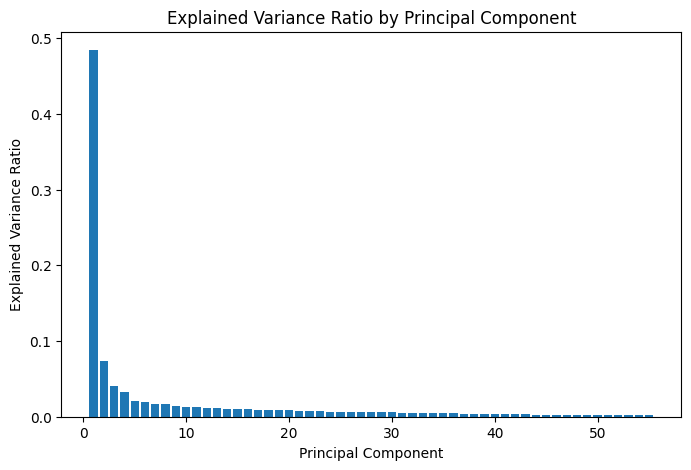

In [100]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=55)  # Reduce to 2 principal components (you can adjust this)
X_train_pca = pca.fit_transform(X_train_df_3)
X_test_pca = pca.transform(X_test_df_3)

# Train a logistic regression model on the principal components
model = LogisticRegression()
model.fit(X_train_pca, Y_train)

# Predict and calculate accuracy
Y_pred_pca = model.predict(X_test_pca)
accuracy_pca = accuracy_score(Y_test, Y_pred_pca)

print(f'Accuracy after PCA: {accuracy_pca:.2f}')

# Optional: Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

array([[ 7.5846437 , -0.16253653, -1.54207717, ...,  0.08757847,
         0.4814617 ,  0.31462907],
       [ 8.04677587, -0.94024807,  2.40014627, ..., -0.27058086,
         0.58009821, -0.68803078],
       [ 3.56248596, -1.11633775, -1.53209784, ...,  0.32660237,
        -0.14676667, -0.10967648],
       ...,
       [10.38637674,  5.76663599,  6.55814461, ..., -0.69812888,
         0.32553301,  1.05669754],
       [-5.91068652,  1.6298439 ,  0.22323677, ..., -0.19727755,
         0.05644102,  0.10975915],
       [-5.4960545 ,  1.03360167,  0.08859116, ..., -0.07278932,
         0.02592193, -0.08482081]])

**-----------------------------------------------------------------------------------------------------------------------------**

***Chi-square***

In [ ]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.head()

In [ ]:
ct = pd.crosstab(titanic['Survived'],titanic['Sex'],margins=True)
ct

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

In [ ]:
titanic.columns[:-1].sort_values(ascending= True)

In [ ]:
score= []
for feature in titanic.columns[:-1]:
    ct= pd.crosstab(titanic["Survived"], titanic[feature])
    p_value= chi2_contingency(ct)[1]
    score.append(p_value)

In [ ]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')